In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura dos dados
arquivo = "StudentsPerformance.csv"
df = pd.read_csv(arquivo)

In [ ]:
# Visualizando as primeiras linhas
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
# Função para calcular a média das notas por gênero
def calcular_medias_por_genero(df, genero):
    df_genero = df[df['gender'] == genero][['gender', 'reading score', 'math score', 'writing score']].copy()
    df_genero['average_score'] = df_genero[['reading score', 'math score', 'writing score']].mean(axis=1).round()
    return df_genero

In [5]:
# Calculando as médias
df_female = calcular_medias_por_genero(df, 'female')
df_male = calcular_medias_por_genero(df, 'male')

In [6]:
# Função para plotar distribuição das médias
def plot_distribuicao_medias(df_scores, titulo, cor):
    score_counts = df_scores['average_score'].value_counts().sort_index().reset_index()
    score_counts.columns = ['score', 'count']

    plt.figure(figsize=(10, 5))
    plt.plot(score_counts['score'], score_counts['count'], marker='o', color=cor)
    plt.title(titulo)
    plt.xlabel('Nota Média')
    plt.ylabel('Número de Estudantes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

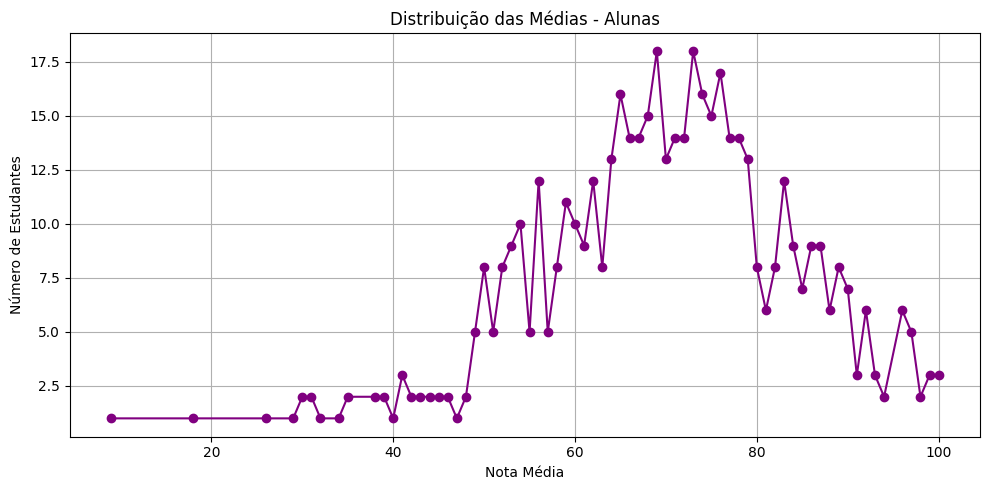

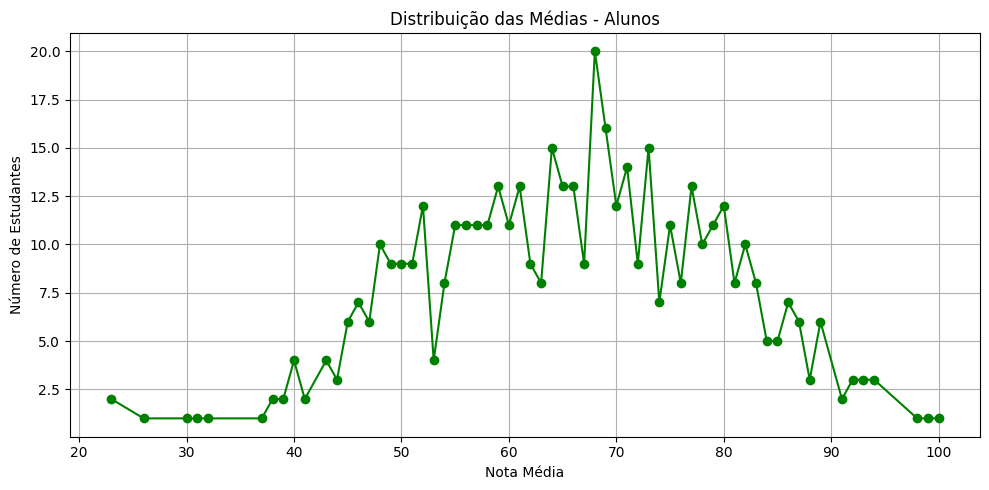

In [7]:
# Plotando gráficos
plot_distribuicao_medias(df_female, 'Distribuição das Médias - Alunas', 'purple')
plot_distribuicao_medias(df_male, 'Distribuição das Médias - Alunos', 'green')

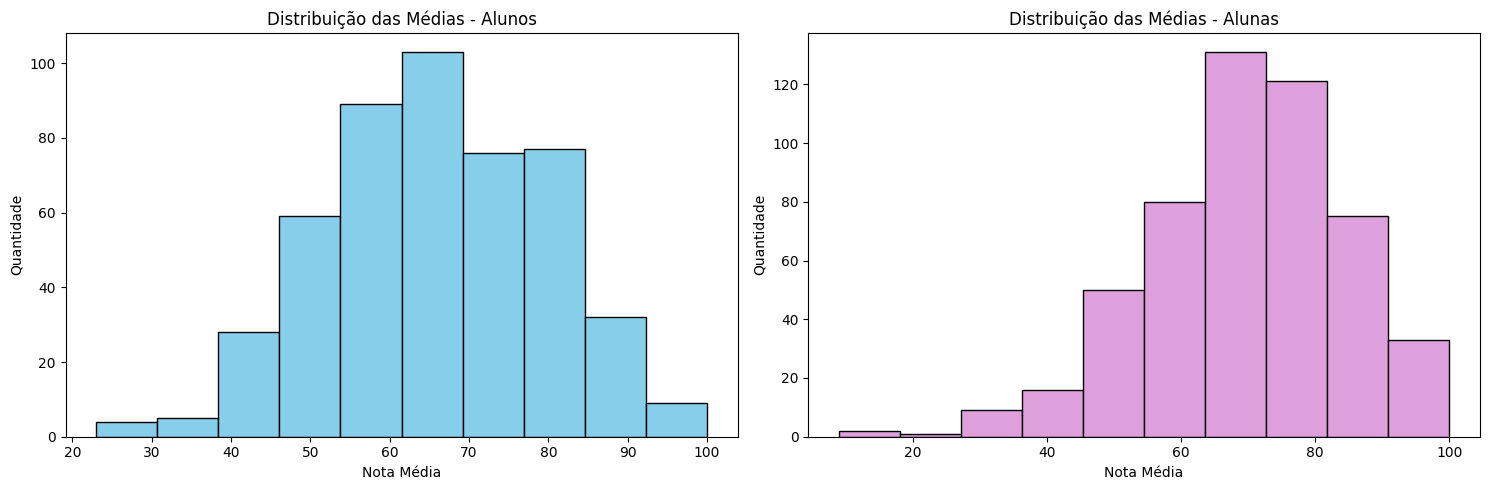

In [8]:
# Histogramas lado a lado
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df_male['average_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição das Médias - Alunos')
plt.xlabel('Nota Média')
plt.ylabel('Quantidade')

plt.subplot(1, 2, 2)
plt.hist(df_female['average_score'], bins=10, color='plum', edgecolor='black')
plt.title('Distribuição das Médias - Alunas')
plt.xlabel('Nota Média')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

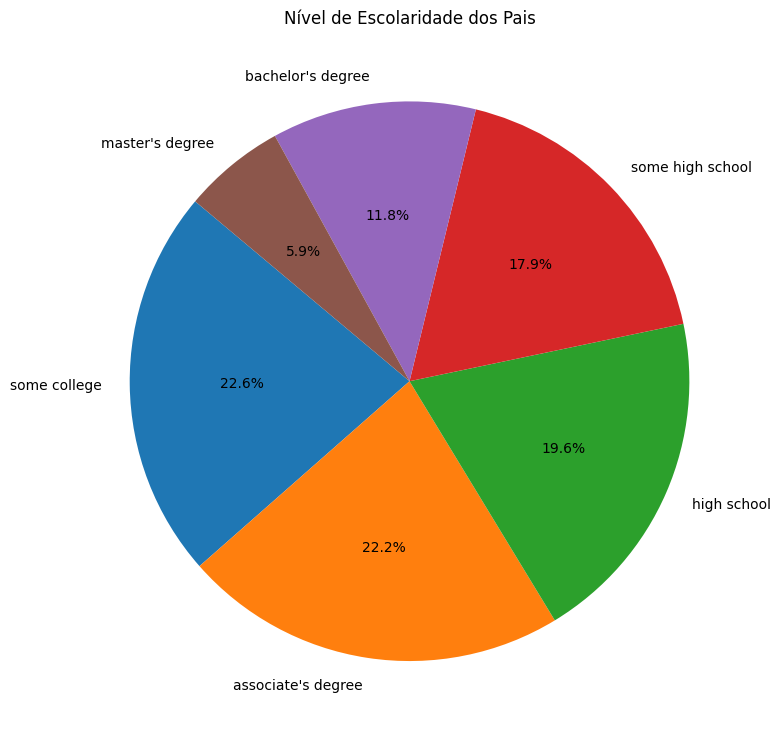

In [9]:
# Gráfico de pizza: Nível de escolaridade dos pais
parent_edu = df['parental level of education'].value_counts()
edu_df = pd.DataFrame({
    'Nível de Escolaridade': parent_edu.index,
    'Quantidade': parent_edu.values
})

plt.figure(figsize=(8, 8))
plt.pie(
    edu_df['Quantidade'],
    labels=edu_df['Nível de Escolaridade'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Nível de Escolaridade dos Pais')
plt.tight_layout()
plt.show()

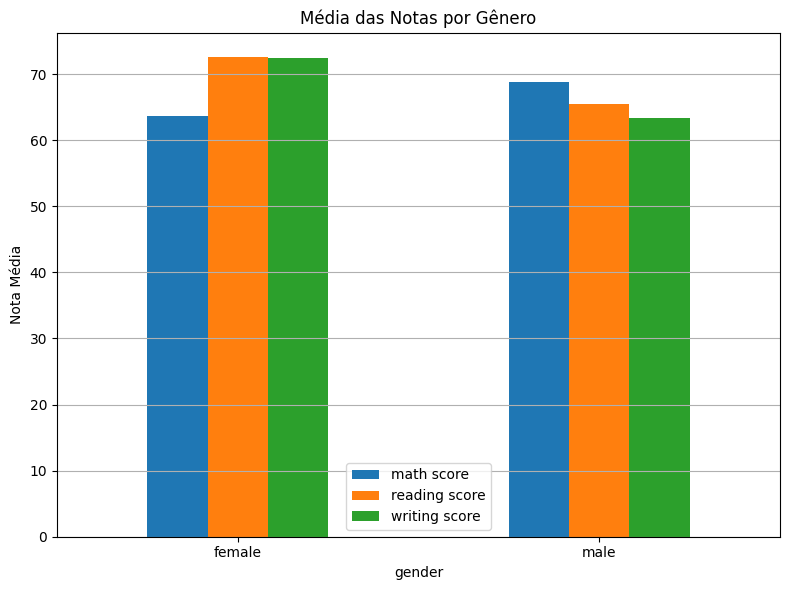

In [10]:
#Comparação de médias por gênero
media_por_genero = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

media_por_genero.plot(kind='bar', figsize=(8, 6))
plt.title('Média das Notas por Gênero')
plt.ylabel('Nota Média')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

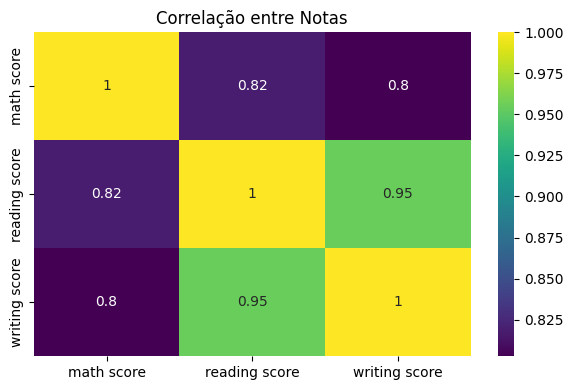

In [11]:
# Mapa de calor das correlações entre notas
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='viridis')
plt.title('Correlação entre Notas')
plt.tight_layout()
plt.show()